<a href="https://colab.research.google.com/github/matthewchung74/inference_nbs/blob/dev/pretrained_cv2_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

based on https://github.com/ultralytics/yolov5/issues/36

In [ ]:
pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

In [9]:
import cv2
import torch
from PIL import Image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...



                 from  n    params  module                                  arguments                     


  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1    656896  models.common.SPP                       [512, 512, [5, 9, 13]]        
  9                -1  1   1182720  m

Adding autoShape... 


YOLOv5 🚀 2021-4-26 torch 1.8.1+cu101 CPU



In [10]:
!pip install -q git+https://github.com/matthewchung74/inference_params.git

In [45]:
import torch.nn.functional as F
import cv2
import torch
import io
import base64
import json

from inference_params.inference_params import inference_test, FieldType, inference_predict

# image input will be the label for the app input
input = {"image input": FieldType.OpenCV}
# result will be the rendered image
output = {"result image": FieldType.OpenCV, "num boxes": FieldType.Text}

@inference_predict(input=input, output=output)
def predict(params):
    img = params['image input']
    results = model(img)  # inference
    results.imgs # array of original images (as np array) passed to model for inference
    results.render()  # updates results.imgs with boxes and labels
    cv2_image = cv2.cvtColor(results.imgs[0], cv2.COLOR_BGR2RGB)
    num_boxes = f"number of boxes {len(results.pandas().xyxy[0])}"
    return {"result image": cv2_image, "num boxes":num_boxes}


number of boxes 6


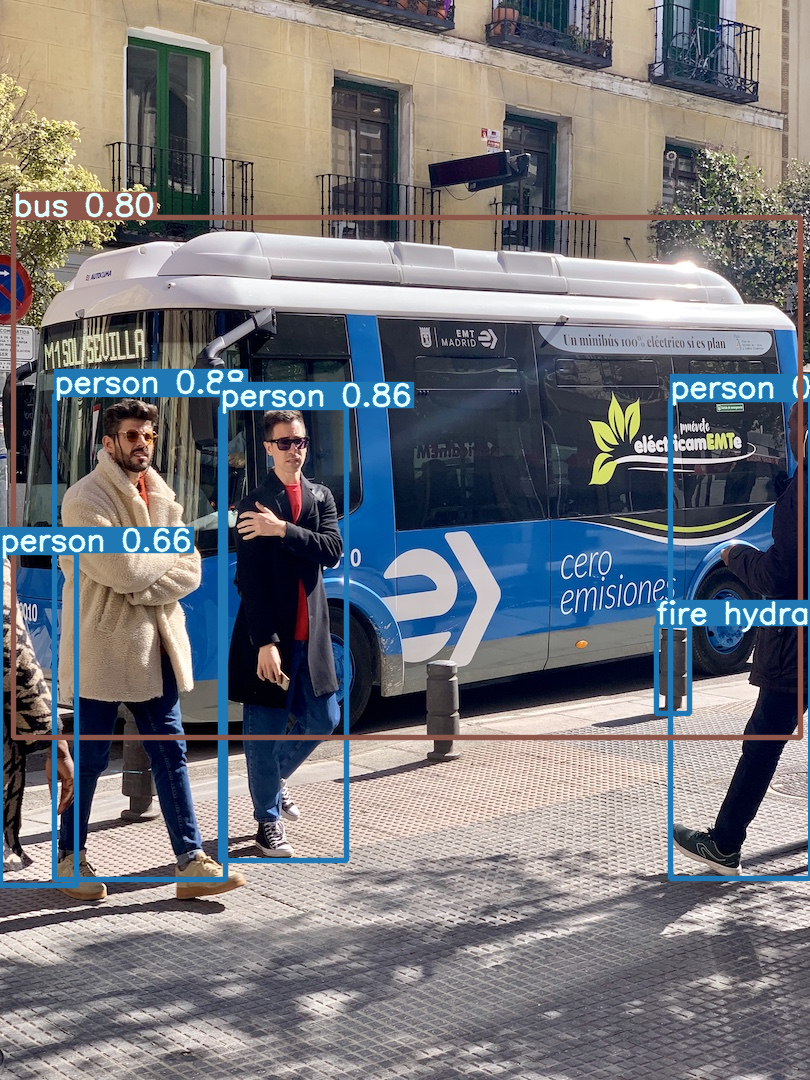

In [46]:
from inference_params.inference_params import in_colab

if in_colab():
    from google.colab.patches import cv2_imshow

    torch.hub.download_url_to_file('https://github.com/ultralytics/yolov5/releases/download/v1.0/bus.jpg', 'bus.jpg')
    img = cv2.imread('bus.jpg')[:, :, ::-1] 

    from inference_params.inference_params import in_colab
    from matplotlib.pyplot import imshow
    import numpy as np

    from google.colab.patches import cv2_imshow
    result, duration = predict({'image input': img})
    result_image = result['result image']
    num_boxes = result['num boxes']
    print(num_boxes)
    cv2_imshow(result_image)

In [47]:
from inference_params.inference_params import in_colab

if in_colab():
    inference_test(predict_func=predict, params={'image input': img})

wrote results to result.json duration: 0.570409 seconds
